In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")

In [3]:
shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# data

In [4]:
z = data[:,0]
dl = data[:,1:]

In [5]:
# scalerz = StandardScaler()
# # scalerz = MinMaxScaler(feature_range=(-1,1))
# # fit scaler on data
# scalerz.fit(z.reshape(-1,1))
# # apply transform
# z = scalerz.transform(z.reshape(-1,1))

In [6]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
z_train, z_test = np.split(z, indx)
dl_train, dl_test = np.split(dll, indx)

In [7]:
# scalerdl.inverse_transform(dl_train.reshape(-1,1))
z_train

array([0.01      , 0.01383342, 0.01913635, 0.02647212, 0.03661999,
       0.05065797, 0.0700773 , 0.09694087, 0.13410237, 0.18550944,
       0.25662299, 0.35499736, 0.49108275, 0.67933539, 0.93975316,
       1.3       , 0.01176156, 0.01627025, 0.02250733, 0.03113533,
       0.04307081, 0.05958165, 0.08242181, 0.11401754])

In [8]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                    min_delta=0.0,
#                                    patience=100,
#                                    restore_best_weights=True)]

In [9]:
def model(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)

    elast = Dense(1, activation='linear')(x)
    return elast

batch_size = 1
epochs = 2000
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 23,461
Trainable params: 23,461
Non-trainable params: 0
_________________________________________________________

In [10]:
model_train = neural_model.fit(z_train, dl_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/2000
24/24 [==============================] - 1s 28ms/step - loss: 0.8216 - val_loss: 0.8150
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.0427 - val_loss: 0.4888
Epoch 3/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.4776 - val_loss: 0.1289
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.2260 - val_loss: 0.1719
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.2236 - val_loss: 0.0163
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 0.0245
Epoch 7/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0728 - val_loss: 0.0099
Epoch 8/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0143
Epoch 9/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0190
Epoch 10/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.010

Epoch 82/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 9.4952e-04
Epoch 83/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 8.7173e-04
Epoch 84/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 85/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0188
Epoch 86/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.0350
Epoch 87/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0134
Epoch 88/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0223
Epoch 89/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 90/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0057
Epoch 91/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 -

Epoch 162/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.0135
Epoch 163/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0043
Epoch 164/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0012
Epoch 165/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0090
Epoch 166/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0016
Epoch 167/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0135
Epoch 168/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 169/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0070
Epoch 170/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0152
Epoch 171/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0148

Epoch 242/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 243/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0018
Epoch 244/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 245/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0081
Epoch 246/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0020
Epoch 247/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0056
Epoch 248/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0132
Epoch 249/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 2.1473e-04
Epoch 250/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 251/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.

24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0231
Epoch 322/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 2.8338e-04
Epoch 323/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0116
Epoch 324/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 325/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0171
Epoch 326/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0210
Epoch 327/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.0178
Epoch 328/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0263
Epoch 329/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0037
Epoch 330/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss

24/24 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 401/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 402/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 403/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0016
Epoch 404/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 3.6835e-04
Epoch 405/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 406/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 407/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0010
Epoch 408/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 409/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss

24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 480/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 4.2525e-04
Epoch 481/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 482/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 7.0630e-04
Epoch 483/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 484/2000
24/24 [==============================] - 0s 4ms/step - loss: 8.9788e-04 - val_loss: 2.9356e-04
Epoch 485/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 8.0880e-04
Epoch 486/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 487/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 7.1446e-04
Epoch 488/2000
24/24 [==============================] - 0s 3ms/step - los

24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 2.5069e-04
Epoch 559/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 560/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 6.9998e-04
Epoch 561/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 5.6222e-04
Epoch 562/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0067
Epoch 563/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0029
Epoch 564/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 6.1597e-04
Epoch 565/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0034
Epoch 566/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 567/2000
24/24 [==============================] - 0s 3ms/step - loss: 8.283

24/24 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 638/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 9.3374e-04
Epoch 639/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 4.0046e-04
Epoch 640/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 641/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0112
Epoch 642/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0188
Epoch 643/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 644/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 645/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 7.4418e-04
Epoch 646/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - 

Epoch 716/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 717/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 2.6438e-04
Epoch 718/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 7.6921e-04
Epoch 719/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 720/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 721/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 722/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 723/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 2.6788e-04
Epoch 724/2000
24/24 [==============================] - 0s 3ms/step - loss: 8.6999e-04 - val_loss: 0.0010
Epoch 725/2000
24/24 [==============================] - 0s 2ms/ste

24/24 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 795/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 6.5780e-04
Epoch 796/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 797/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 6.3067e-04
Epoch 798/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0065
Epoch 799/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 800/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 801/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 802/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 8.7202e-04
Epoch 803/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0037 - 

Epoch 873/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 5.4920e-04
Epoch 874/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 875/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 876/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 877/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 3.6898e-04
Epoch 878/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0058
Epoch 879/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 2.6884e-04
Epoch 880/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 4.4591e-04
Epoch 881/2000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 3.9951e-04
Epoch 882/2000
24/24 [==============================] - 0s 3ms

24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 4.6459e-04
Epoch 952/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 953/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0103
Epoch 954/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 955/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 956/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 957/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 7.0362e-04
Epoch 958/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 959/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 5.6212e-04
Epoch 960/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - 

24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 1030/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 1031/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 4.3245e-04
Epoch 1032/2000
24/24 [==============================] - 0s 3ms/step - loss: 9.8991e-04 - val_loss: 5.3512e-04
Epoch 1033/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 4.6993e-04
Epoch 1034/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.4321e-04
Epoch 1035/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 8.1539e-04
Epoch 1036/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 1037/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 1.8649e-04
Epoch 1038/2000
24/24 [==============================] - 0s 3

24/24 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 2.1752e-04
Epoch 1107/2000
24/24 [==============================] - 0s 4ms/step - loss: 8.4267e-04 - val_loss: 7.2550e-04
Epoch 1108/2000
24/24 [==============================] - 0s 3ms/step - loss: 7.3852e-04 - val_loss: 0.0014
Epoch 1109/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 1110/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 4.5190e-04
Epoch 1111/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 1112/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0024
Epoch 1113/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 1114/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 1115/2000
24/24 [==============================] - 0s 4ms/step 

24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 4.6516e-04
Epoch 1184/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 8.5454e-04
Epoch 1185/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 1186/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 2.6415e-04
Epoch 1187/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 1188/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 8.3317e-04
Epoch 1189/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 6.3260e-04
Epoch 1190/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 3.1451e-04
Epoch 1191/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 7.5956e-04
Epoch 1192/2000
24/24 [==============================] - 0s 5

Epoch 1261/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 5.9538e-04
Epoch 1262/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 6.7463e-04
Epoch 1263/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 4.9571e-04
Epoch 1264/2000
24/24 [==============================] - 0s 3ms/step - loss: 8.5507e-04 - val_loss: 3.5514e-04
Epoch 1265/2000
24/24 [==============================] - 0s 3ms/step - loss: 9.2979e-04 - val_loss: 6.5485e-04
Epoch 1266/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 3.4860e-04
Epoch 1267/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 1268/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 9.8718e-04
Epoch 1269/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 1.7380e-04
Epoch 1270/2000
24/24 [==========

24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 6.3546e-04
Epoch 1339/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 2.8818e-04
Epoch 1340/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 1341/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0038
Epoch 1342/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 4.3424e-04
Epoch 1343/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 1344/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 1345/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 1346/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0032
Epoch 1347/2000
24/24 [==============================] - 0s 3ms/step - loss: 

Epoch 1416/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0021
Epoch 1417/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0091
Epoch 1418/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 1419/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 1420/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 1421/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0011
Epoch 1422/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 6.7606e-04
Epoch 1423/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 5.1763e-04
Epoch 1424/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 1425/2000
24/24 [==============================] - 0s 3ms/s

Epoch 1494/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 1495/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 8.5310e-04
Epoch 1496/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 9.2815e-04
Epoch 1497/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 6.5063e-04
Epoch 1498/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 5.6680e-04
Epoch 1499/2000
24/24 [==============================] - 0s 4ms/step - loss: 9.8939e-04 - val_loss: 0.0012
Epoch 1500/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 1501/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 9.5841e-04
Epoch 1502/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 1503/2000
24/24 [==========================

24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 9.4479e-04
Epoch 1572/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 5.4232e-04
Epoch 1573/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 7.0237e-04
Epoch 1574/2000
24/24 [==============================] - 0s 5ms/step - loss: 4.5552e-04 - val_loss: 8.8288e-04
Epoch 1575/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 1576/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 1577/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 5.7784e-04
Epoch 1578/2000
24/24 [==============================] - 0s 4ms/step - loss: 5.8172e-04 - val_loss: 9.9023e-04
Epoch 1579/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 1580/2000
24/24 [==============================] - 

24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1649/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 1650/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 8.8383e-04
Epoch 1651/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 1652/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 8.3281e-04
Epoch 1653/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 7.4065e-04
Epoch 1654/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 6.3157e-04
Epoch 1655/2000
24/24 [==============================] - 0s 4ms/step - loss: 4.7910e-04 - val_loss: 6.4099e-04
Epoch 1656/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1657/2000
24/24 [==============================] - 0s 4ms/s

24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 5.9946e-04
Epoch 1726/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 7.9692e-04
Epoch 1727/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 1728/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 8.1205e-04
Epoch 1729/2000
24/24 [==============================] - 0s 3ms/step - loss: 6.8435e-04 - val_loss: 0.0016
Epoch 1730/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 1.5660e-04
Epoch 1731/2000
24/24 [==============================] - 0s 4ms/step - loss: 8.9168e-04 - val_loss: 5.9913e-04
Epoch 1732/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 1733/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 7.0441e-04
Epoch 1734/2000
24/24 [==============================] - 

24/24 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 7.3294e-04
Epoch 1803/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 1804/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1805/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 1806/2000
24/24 [==============================] - 0s 3ms/step - loss: 8.7992e-04 - val_loss: 0.0016
Epoch 1807/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 4.6434e-04
Epoch 1808/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 6.7207e-04
Epoch 1809/2000
24/24 [==============================] - 0s 3ms/step - loss: 9.2762e-04 - val_loss: 0.0013
Epoch 1810/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 6.9660e-04
Epoch 1811/2000
24/24 [==============================] - 0s 3ms/s

24/24 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 6.4221e-04
Epoch 1880/2000
24/24 [==============================] - 0s 4ms/step - loss: 9.6334e-04 - val_loss: 0.0011
Epoch 1881/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 1882/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 2.5661e-04
Epoch 1883/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 1884/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 7.1707e-04
Epoch 1885/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 7.0146e-04
Epoch 1886/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 3.9410e-04
Epoch 1887/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 1888/2000
24/24 [==============================] - 0s 5ms/s

24/24 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 1957/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 8.9487e-04
Epoch 1958/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 1959/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 1960/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 5.0441e-04
Epoch 1961/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 5.5479e-04
Epoch 1962/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1963/2000
24/24 [==============================] - 0s 3ms/step - loss: 5.1725e-04 - val_loss: 8.6299e-04
Epoch 1964/2000
24/24 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 7.1203e-04
Epoch 1965/2000
24/24 [==============================] - 0s 3ms/s

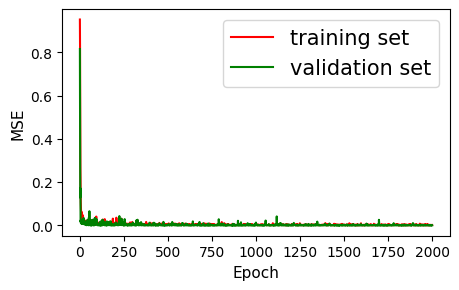

In [24]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
plt.savefig("loss_dlbinnedJla_.png")

In [12]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]
# 300 ep (0.5874642133712769, 0.2920302748680115, 0.8262724280357361)
# 500 ep (0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

(0.0018554008565843105, 0.0005722931819036603, 0.0005975488456897438)

In [13]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
ranz = z
# ranzz = ranz
pred_random = neural_model.predict(ranz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random.reshape(-1,1))

In [14]:
# fake_data = np.concatenate((z.reshape(-1,1), dl.reshape(-1,1)), axis=1, )
# fake_data = np.stack((ranz, dlfake.reshape(31,)), axis=1)
index = np.argsort(ranz)
fake_data = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
dl.reshape(31,)

array([32.95388698, 33.84214074, 34.59344598, 35.25209633, 36.06978761,
       36.65111059, 37.43017325, 38.25325404, 39.06785071, 39.79214362,
       40.56495606, 41.42141744, 42.23146107, 43.05273149, 43.97257341,
       44.82186746, 33.87900347, 34.11856704, 34.93902653, 35.74850165,
       36.43457047, 37.15801411, 37.95661635, 38.61286934, 39.3414019 ,
       40.1565346 , 40.90528778, 41.79092346, 42.61704707, 43.50415083,
       44.51408758])

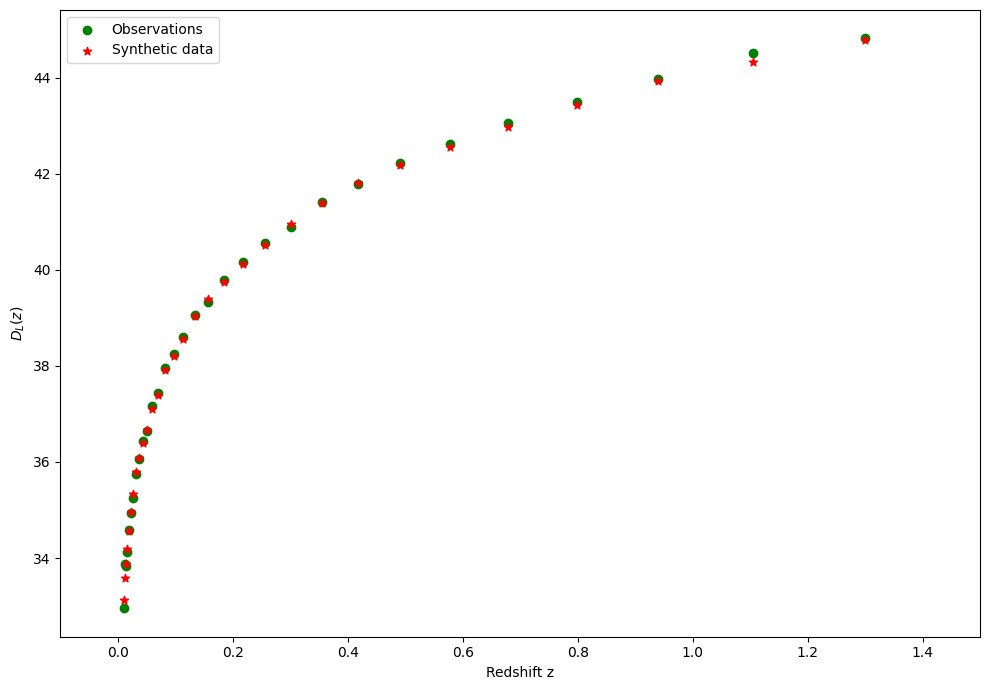

In [16]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(ranz, dlfake, c='r', label='Synthetic data', marker='*')
# plt.errorbar(z, dl, yerr=errors, fmt='g.', markersize=10, label='Observations')
# plt.errorbar(ranz, pred_random, 
#              yerr=fakeerrors, fmt='r.', markersize=10., label='Synthetic data with errors')

# plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$D_L(z)$")
plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [18]:
neural_model.save('FFNN_JLA.h5')